# Ev.8:- Rainfall Prediction

In [1]:
#Libraries to be used for model building
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the csv file.
data=pd.read_csv("weatherAUS.csv")

In [3]:
# .head used for fetching first five rows 
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# EXPLORATORY DATA ANALYSIS( EDA):-

In [4]:
# For checking how many rows and columns are there in dataset:-
data.shape

(8425, 23)

In this dataset, there are 8425 rows and 23 columns.

In [5]:
# For checking the number of unique values:- 
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

Here, column Date has high number of Unique values that will affect our model performance further. so it needs to be dropped.

In [6]:
# For checking the Null/NAN values in the dataset:-
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Here, almost all the columns are having null values,
so it requires to be converted with mean and mode respectively as per Nature of Target variable.

In [7]:
#  For checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
# For seeing the available columns in the dataset:-
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

These are the available columns present in the dataset.

In [9]:
# For checking the datatypes of each columns:-
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Here, the Target column has object datatype, so it is a Classification Problem.

In [10]:
# For checking the statistical summary of the dataset for working ahead:-
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

<AxesSubplot:>

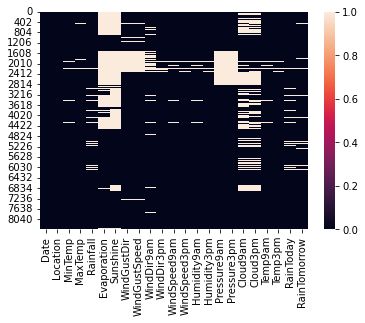

In [11]:
# For checking null values through heatmap method also:-
sns.heatmap(data.isnull())

In [12]:
# For checking the value counts in all columns of the dataset:-
for i in data.columns:
    print(data[i].value_counts())
    print('___')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
___
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
___
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
___
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
___
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1

In [13]:
# For dropping Date column as it will create hurdle in further processes:-
data.drop(columns=['Date'],axis=1,inplace=True)

In [14]:
# For checking whether column has been removed or not?
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          W        WNW  ...         71.0         22.0   
1           44.0        NNW        WSW  ...         44.0         25.0   
2           46.0          W        WSW  ...         38.0         30.0   
3           24.0         SE          E  ...         45.0         16.0   
4           41.0        ENE         NW  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 22 columns]

As seen above, Date column has been removed properly.

In [30]:
# For filling NaN values using Imputation techniques (Mean, Mode):-
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())

In [29]:
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())

In [26]:
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [25]:
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mean())

In [24]:
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

In [22]:
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())

In [36]:
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mode()[0])
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])

In [37]:
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [39]:
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())

In [40]:
# For checking whether all Null values has been replaced with mean/mode :-
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now, as seen above all the Null values has been removed from the dataset.

# Visualisations:-

In [42]:
# For seperating Numerical and Categorical features:-
Category=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        Category.append(i)
print(Category)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [43]:
# For seperating Numerical and Categorical features:-
Numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        Numerical.append(i)
print(Numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# Performing Univariate Analysis:-

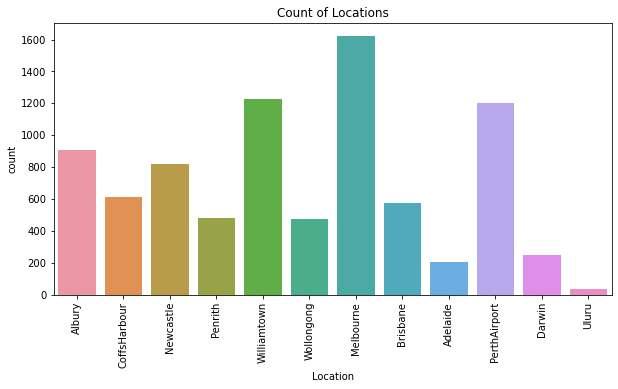

In [44]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(data["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=90)
plt.show()

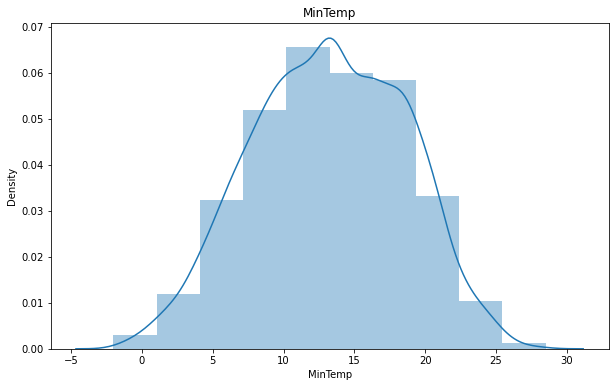

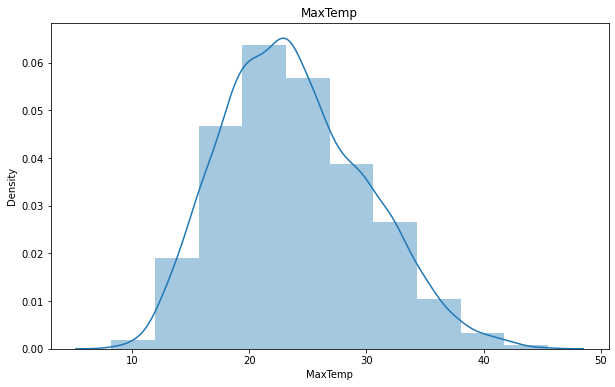

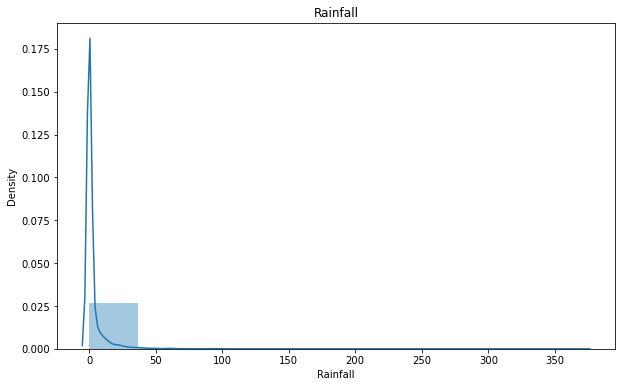

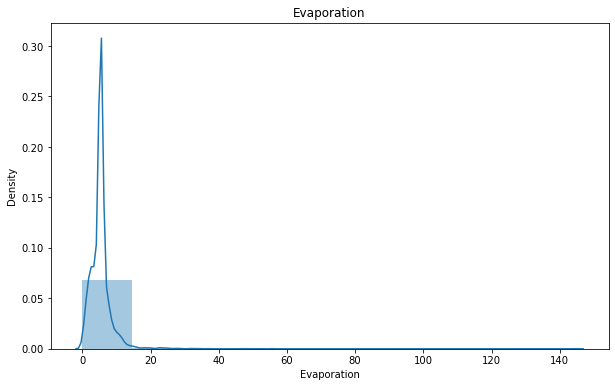

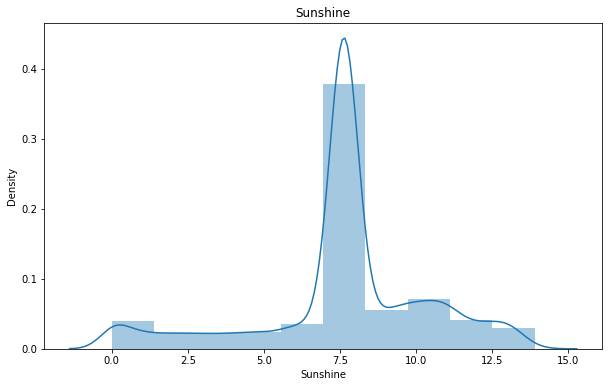

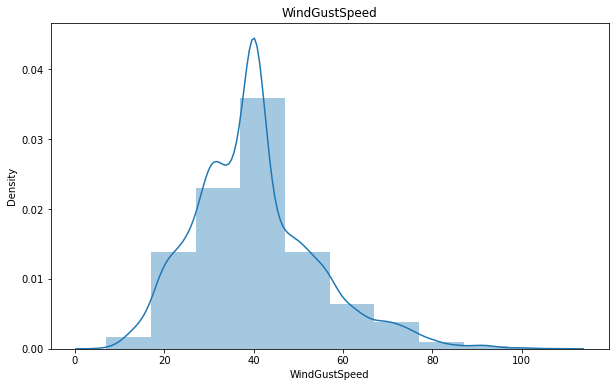

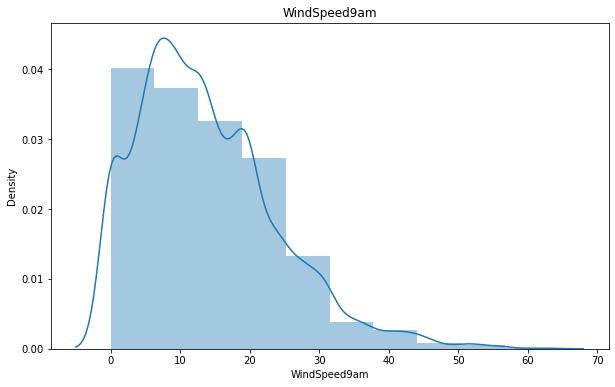

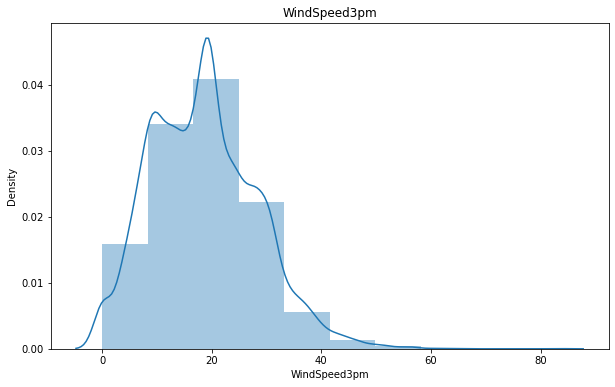

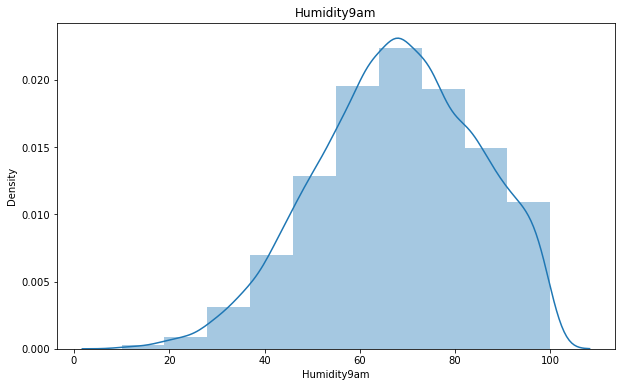

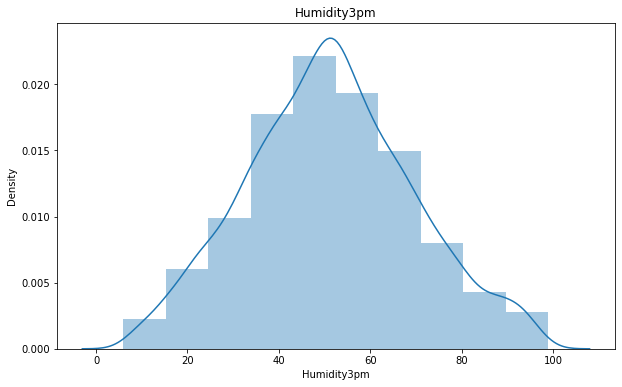

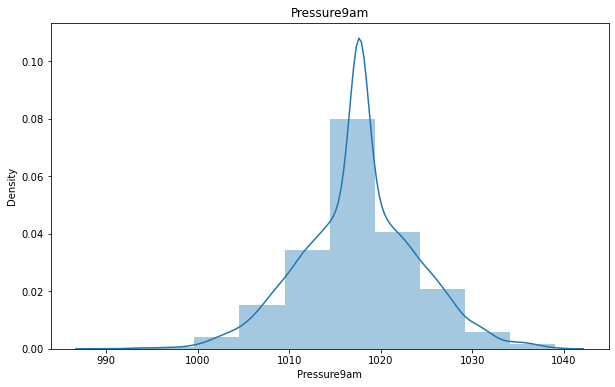

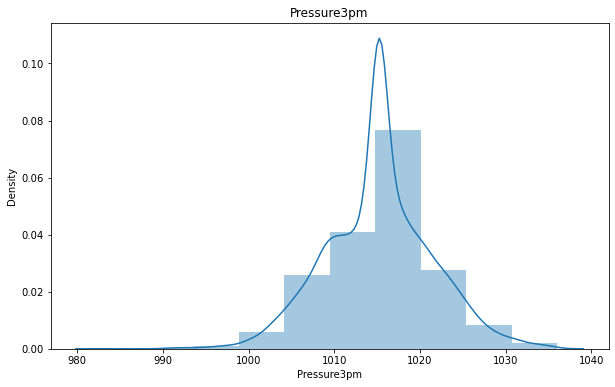

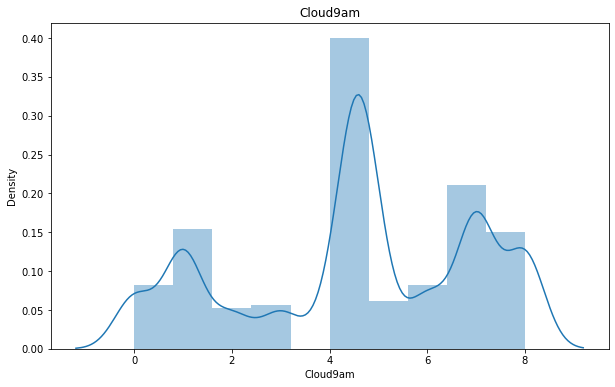

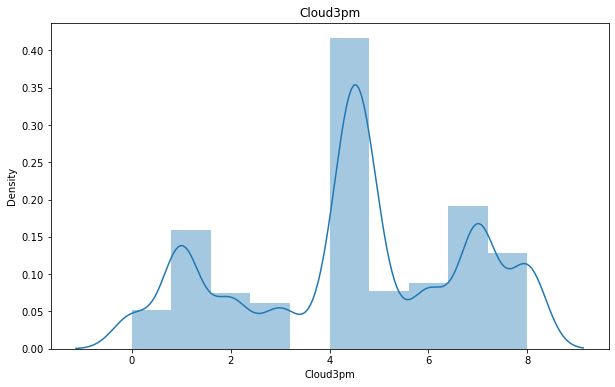

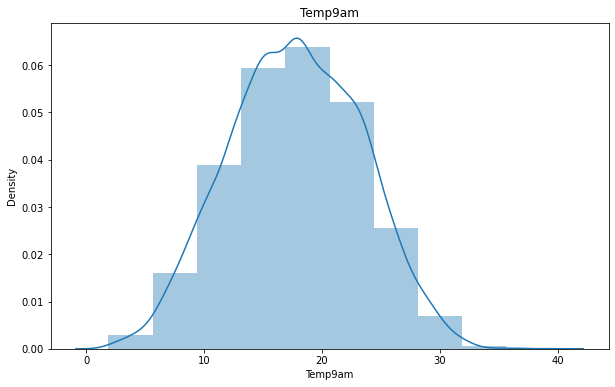

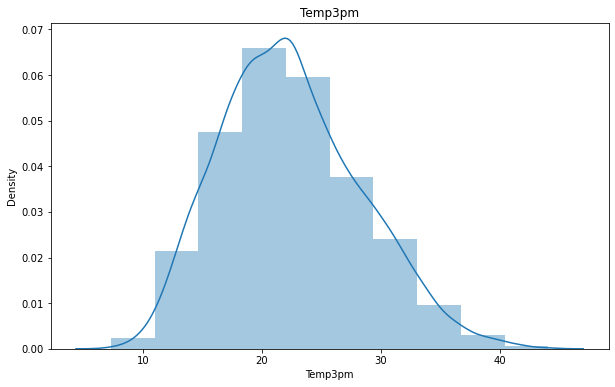

In [45]:
# For visualising  Numerical columns using dist plot method:-
for i in data[Numerical]:
    plt.figure(figsize=(10,6))
    sns.distplot(data[i], bins=10)
    plt.title(i)
    plt.show()

Here, some columns are having skewness as well as outliers which needs to be rectified.

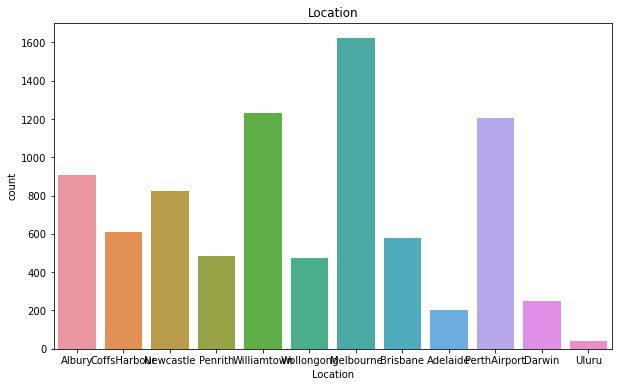

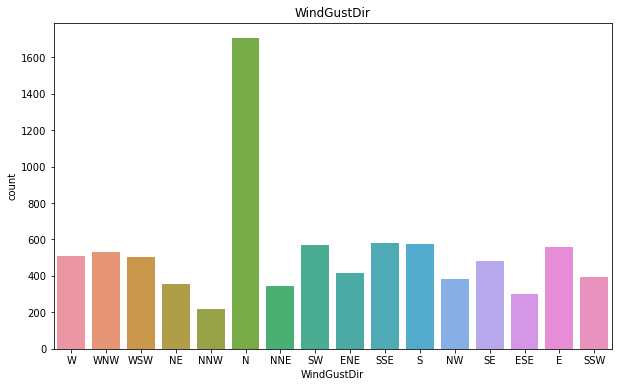

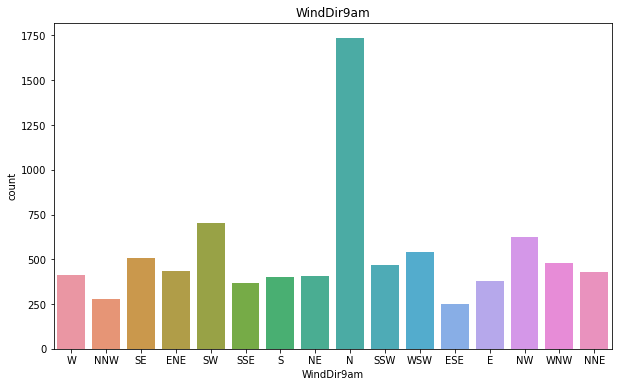

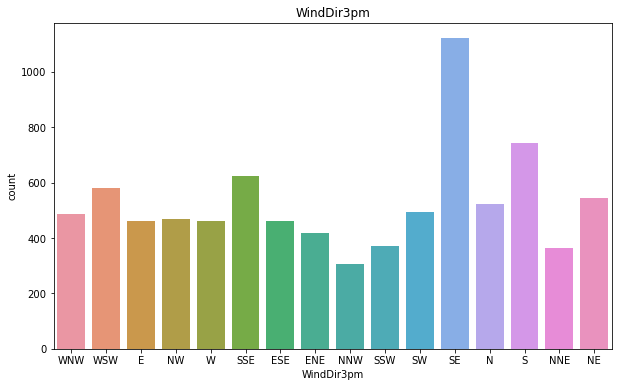

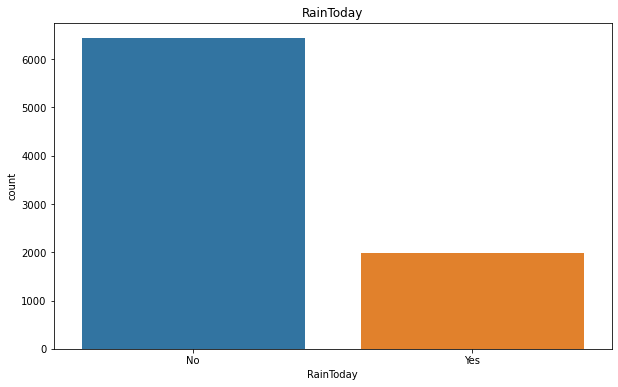

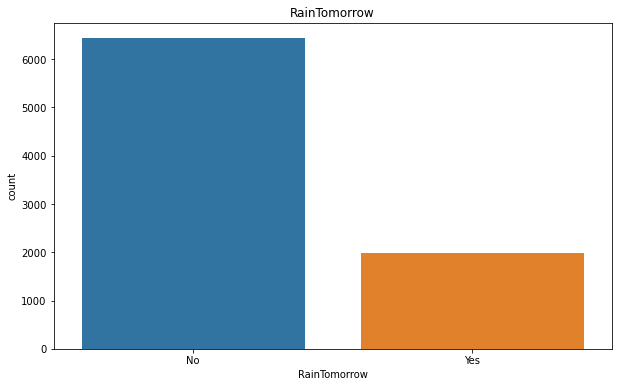

In [46]:
# For visualising categorical columns using countplot method:-
for i in data[Category]:
    plt.figure(figsize=(10,6))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

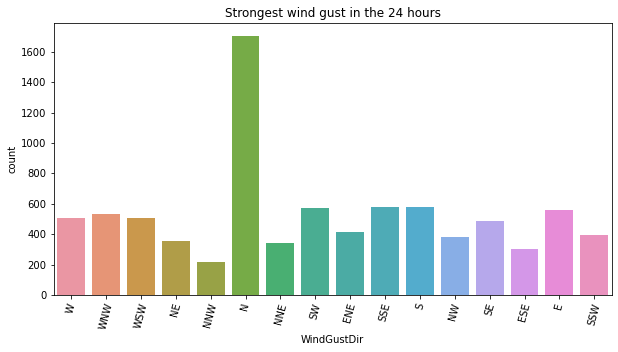

In [47]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(data["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

Here, the strongest wind was in North direction at around 17:00 Hrs.

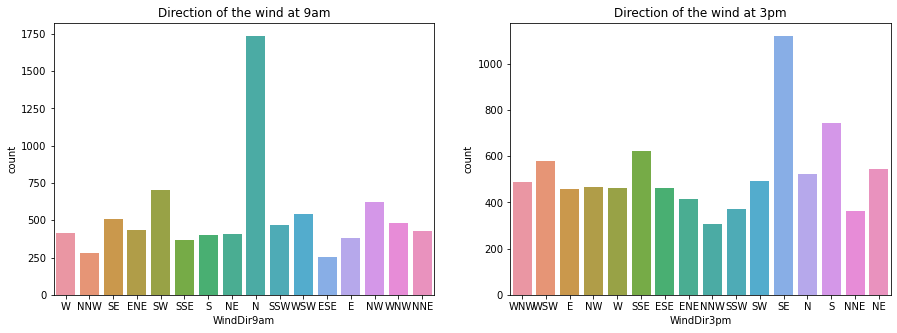

In [48]:
# For visualising the wind at 9 am and 3pm:-
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(data['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(data['WindDir3pm'])
plt.show()

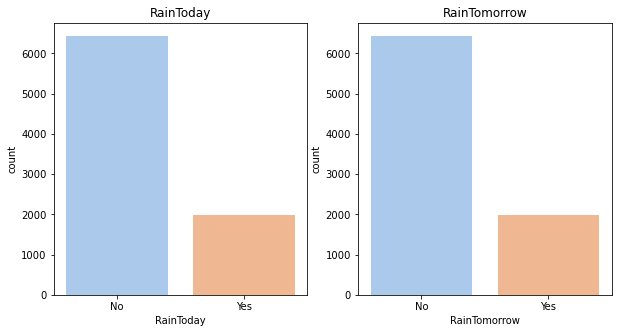

In [49]:
# For visualising Rainfall today and tomorrow:-
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(data['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(data['RainTomorrow'], palette='pastel')
plt.show()

Here, predictions were approximately same for both options.

# Bivariate Analysis:-

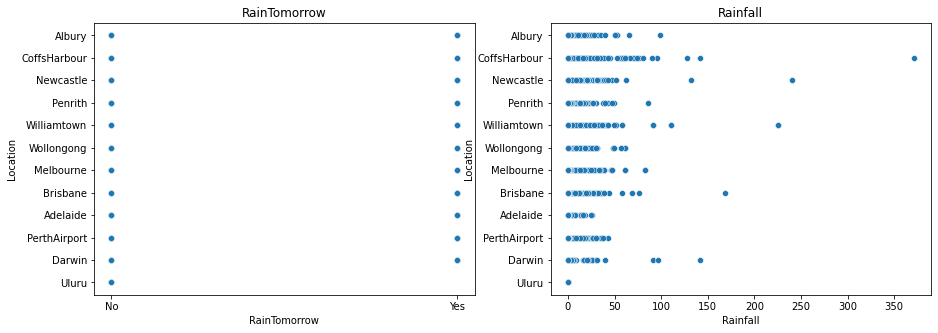

In [50]:
# For checking the correlation between location with both the Targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=data)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=data)
plt.show()

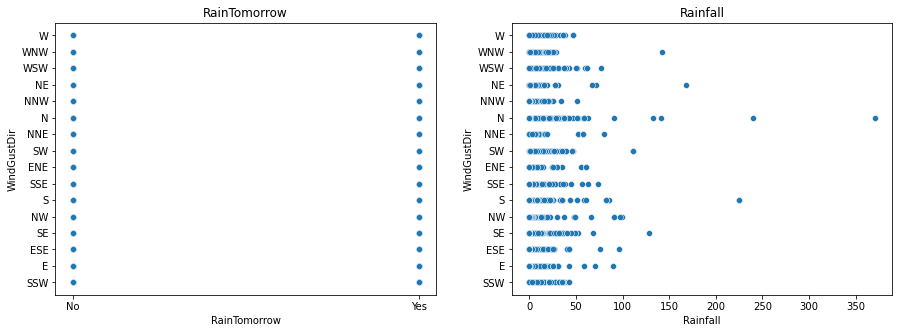

In [51]:
# For checking the correlation between WindGustDir with both Targets (Rainfall and Rain Tommorow):-
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=data)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=data)
plt.show()

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

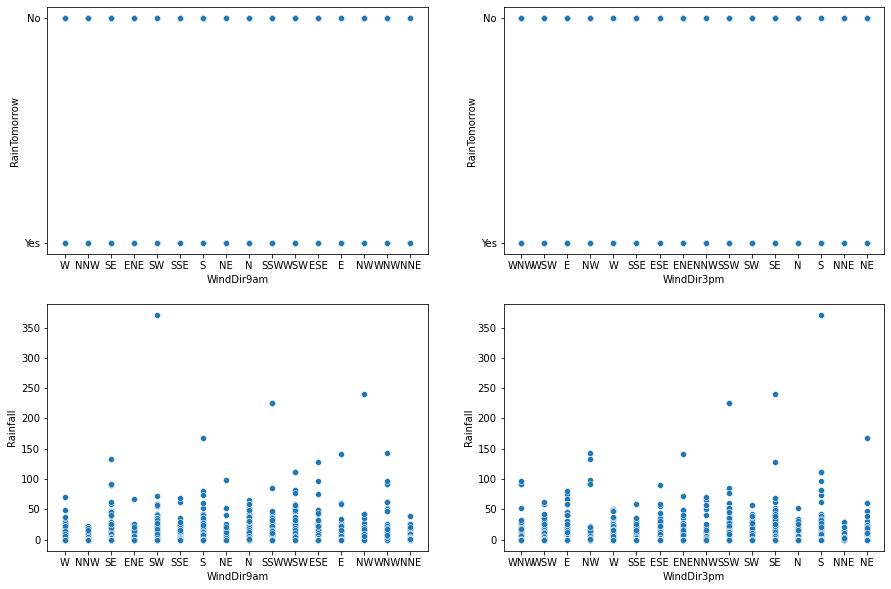

In [52]:
# For checking correlation between Target columns and features:-
fig,axes=plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],data=data)

sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

In this, the observations is seen above.

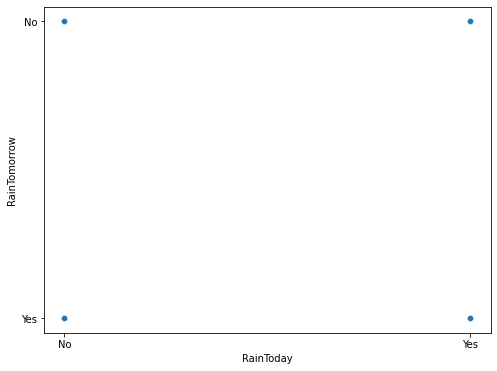

In [53]:
# For checking correlation between Rain Today and Rain Tomorrow:-
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['RainToday'],y=data['RainTomorrow'])
plt.show()

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

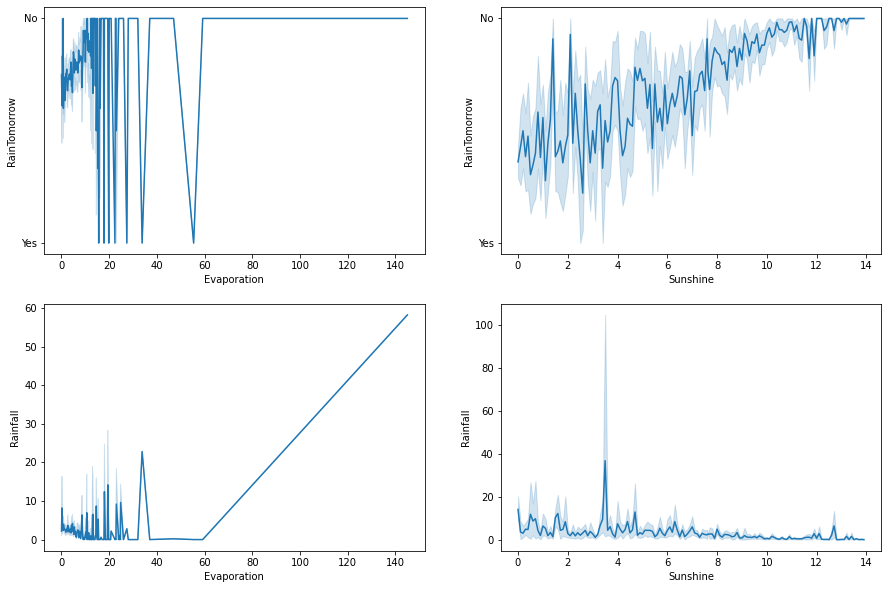

In [54]:
# For checking correlation between features and Target columns using another plotting method:-
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],data=data)

sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],data=data)

# For checking the correlation between Evaporation and Rainfall:-
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],data=data)

# For checking the correlation between Sunshine and Rainfall:-
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],data=data)

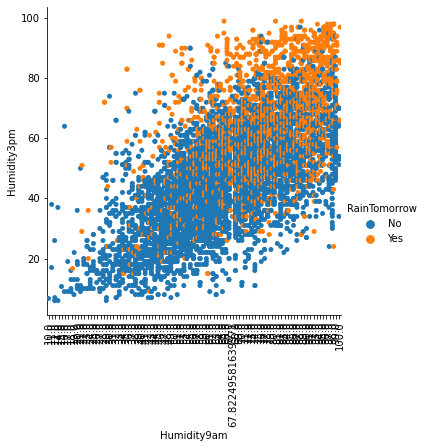

In [55]:
# For checking correlation between Humidity9am and Humidity3pm using another plotting method:-
sns.catplot(x = "Humidity9am", y = "Humidity3pm", hue = "RainTomorrow", data=data, split=True)
plt.xticks(rotation=90);

# Multi Variate Analysis:-

In [59]:
# For checking correlation among multiple columns:-
corr=data.corr()
corr

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.717522  0.085723     0.254965  0.056184   
MaxTemp        0.717522  1.000000 -0.087710     0.322405  0.378403   
Rainfall       0.085723 -0.087710  1.000000     0.024742 -0.167120   
Evaporation    0.254965  0.322405  0.024742     1.000000  0.226001   
Sunshine       0.056184  0.378403 -0.167120     0.226001  1.000000   
WindGustSpeed  0.230058  0.139998  0.083374     0.136371 -0.013778   
WindSpeed9am   0.136872  0.013314  0.048812     0.104294 -0.018069   
WindSpeed3pm   0.178349  0.088172  0.021654     0.101126  0.030145   
Humidity9am   -0.130731 -0.390976  0.227595    -0.213108 -0.360831   
Humidity3pm    0.079048 -0.421879  0.234938    -0.161661 -0.440268   
Pressure9am   -0.429432 -0.325721 -0.069604    -0.177786  0.021887   
Pressure3pm   -0.422991 -0.403258 -0.031268    -0.189558 -0.035863   
Cloud9am       0.091604 -0.253968  0.183811    -0.062283 -0.533391   
Cloud3pm       0.038414 -0.250132  0.150187    -0.108022 -0.547304   
Temp9am        0.887119  0.866039 -0.007351     0.305264  0.250640   
Temp3pm        0.685520  0.974506 -0.090768     0.315109  0.395324   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.230058      0.136872      0.178349    -0.130731   
MaxTemp             0.139998      0.013314      0.088172    -0.390976   
Rainfall            0.083374      0.048812      0.021654     0.227595   
Evaporation         0.136371      0.104294      0.101126    -0.213108   
Sunshine           -0.013778     -0.018069      0.030145    -0.360831   
WindGustSpeed       1.000000      0.600198      0.634939    -0.269593   
WindSpeed9am        0.600198      1.000000      0.560660    -0.358391   
WindSpeed3pm        0.634939      0.560660      1.000000    -0.250953   
Humidity9am        -0.269593     -0.358391     -0.250953     1.000000   
Humidity3pm        -0.091860     -0.110587     -0.091004     0.633291   
Pressure9am        -0.407139     -0.174679     -0.251697     0.142374   
Pressure3pm        -0.372651     -0.138454     -0.207544     0.173415   
Cloud9am            0.023313     -0.000549      0.005061     0.404742   
Cloud3pm            0.078631      0.058198      0.003295     0.296862   
Temp9am             0.202298      0.109798      0.184188    -0.378344   
Temp3pm             0.102199     -0.002606      0.066087    -0.382401   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.079048    -0.429432    -0.422991  0.091604  0.038414   
MaxTemp          -0.421879    -0.325721    -0.403258 -0.253968 -0.250132   
Rainfall          0.234938    -0.069604    -0.031268  0.183811  0.150187   
Evaporation      -0.161661    -0.177786    -0.189558 -0.062283 -0.108022   
Sunshine         -0.440268     0.021887    -0.035863 -0.533391 -0.547304   
WindGustSpeed    -0.091860    -0.407139    -0.372651  0.023313  0.078631   
WindSpeed9am     -0.110587    -0.174679    -0.138454 -0.000549  0.058198   
WindSpeed3pm     -0.091004    -0.251697    -0.207544  0.005061  0.003295   
Humidity9am       0.633291     0.142374     0.173415  0.404742  0.296862   
Humidity3pm       1.000000     0.001629     0.070369  0.424348  0.439965   
Pressure9am       0.001629     1.000000     0.961428 -0.070820 -0.082645   
Pressure3pm       0.070369     0.961428     1.000000 -0.012409 -0.028748   
Cloud9am          0.424348    -0.070820    -0.012409  1.000000  0.574943   
Cloud3pm          0.439965    -0.082645    -0.028748  0.574943  1.000000   
Temp9am          -0.130414    -0.410849    -0.439378 -0.135486 -0.125926   
Temp3pm          -0.491485    -0.283412    -0.369953 -0.268824 -0.291707   

                Temp9am   Temp3pm  
MinTemp        0.887119  0.685520  
MaxTemp        0.866039  0.974506  
Rainfall      -0.007351 -0.090768  
Evaporation    0.305264  0.315109  
Sunshine       0.250640  0.395324  
WindGustSpeed  0.202298  0.102199  
WindSpeed9am   0.109798 -0.002606  
Wi

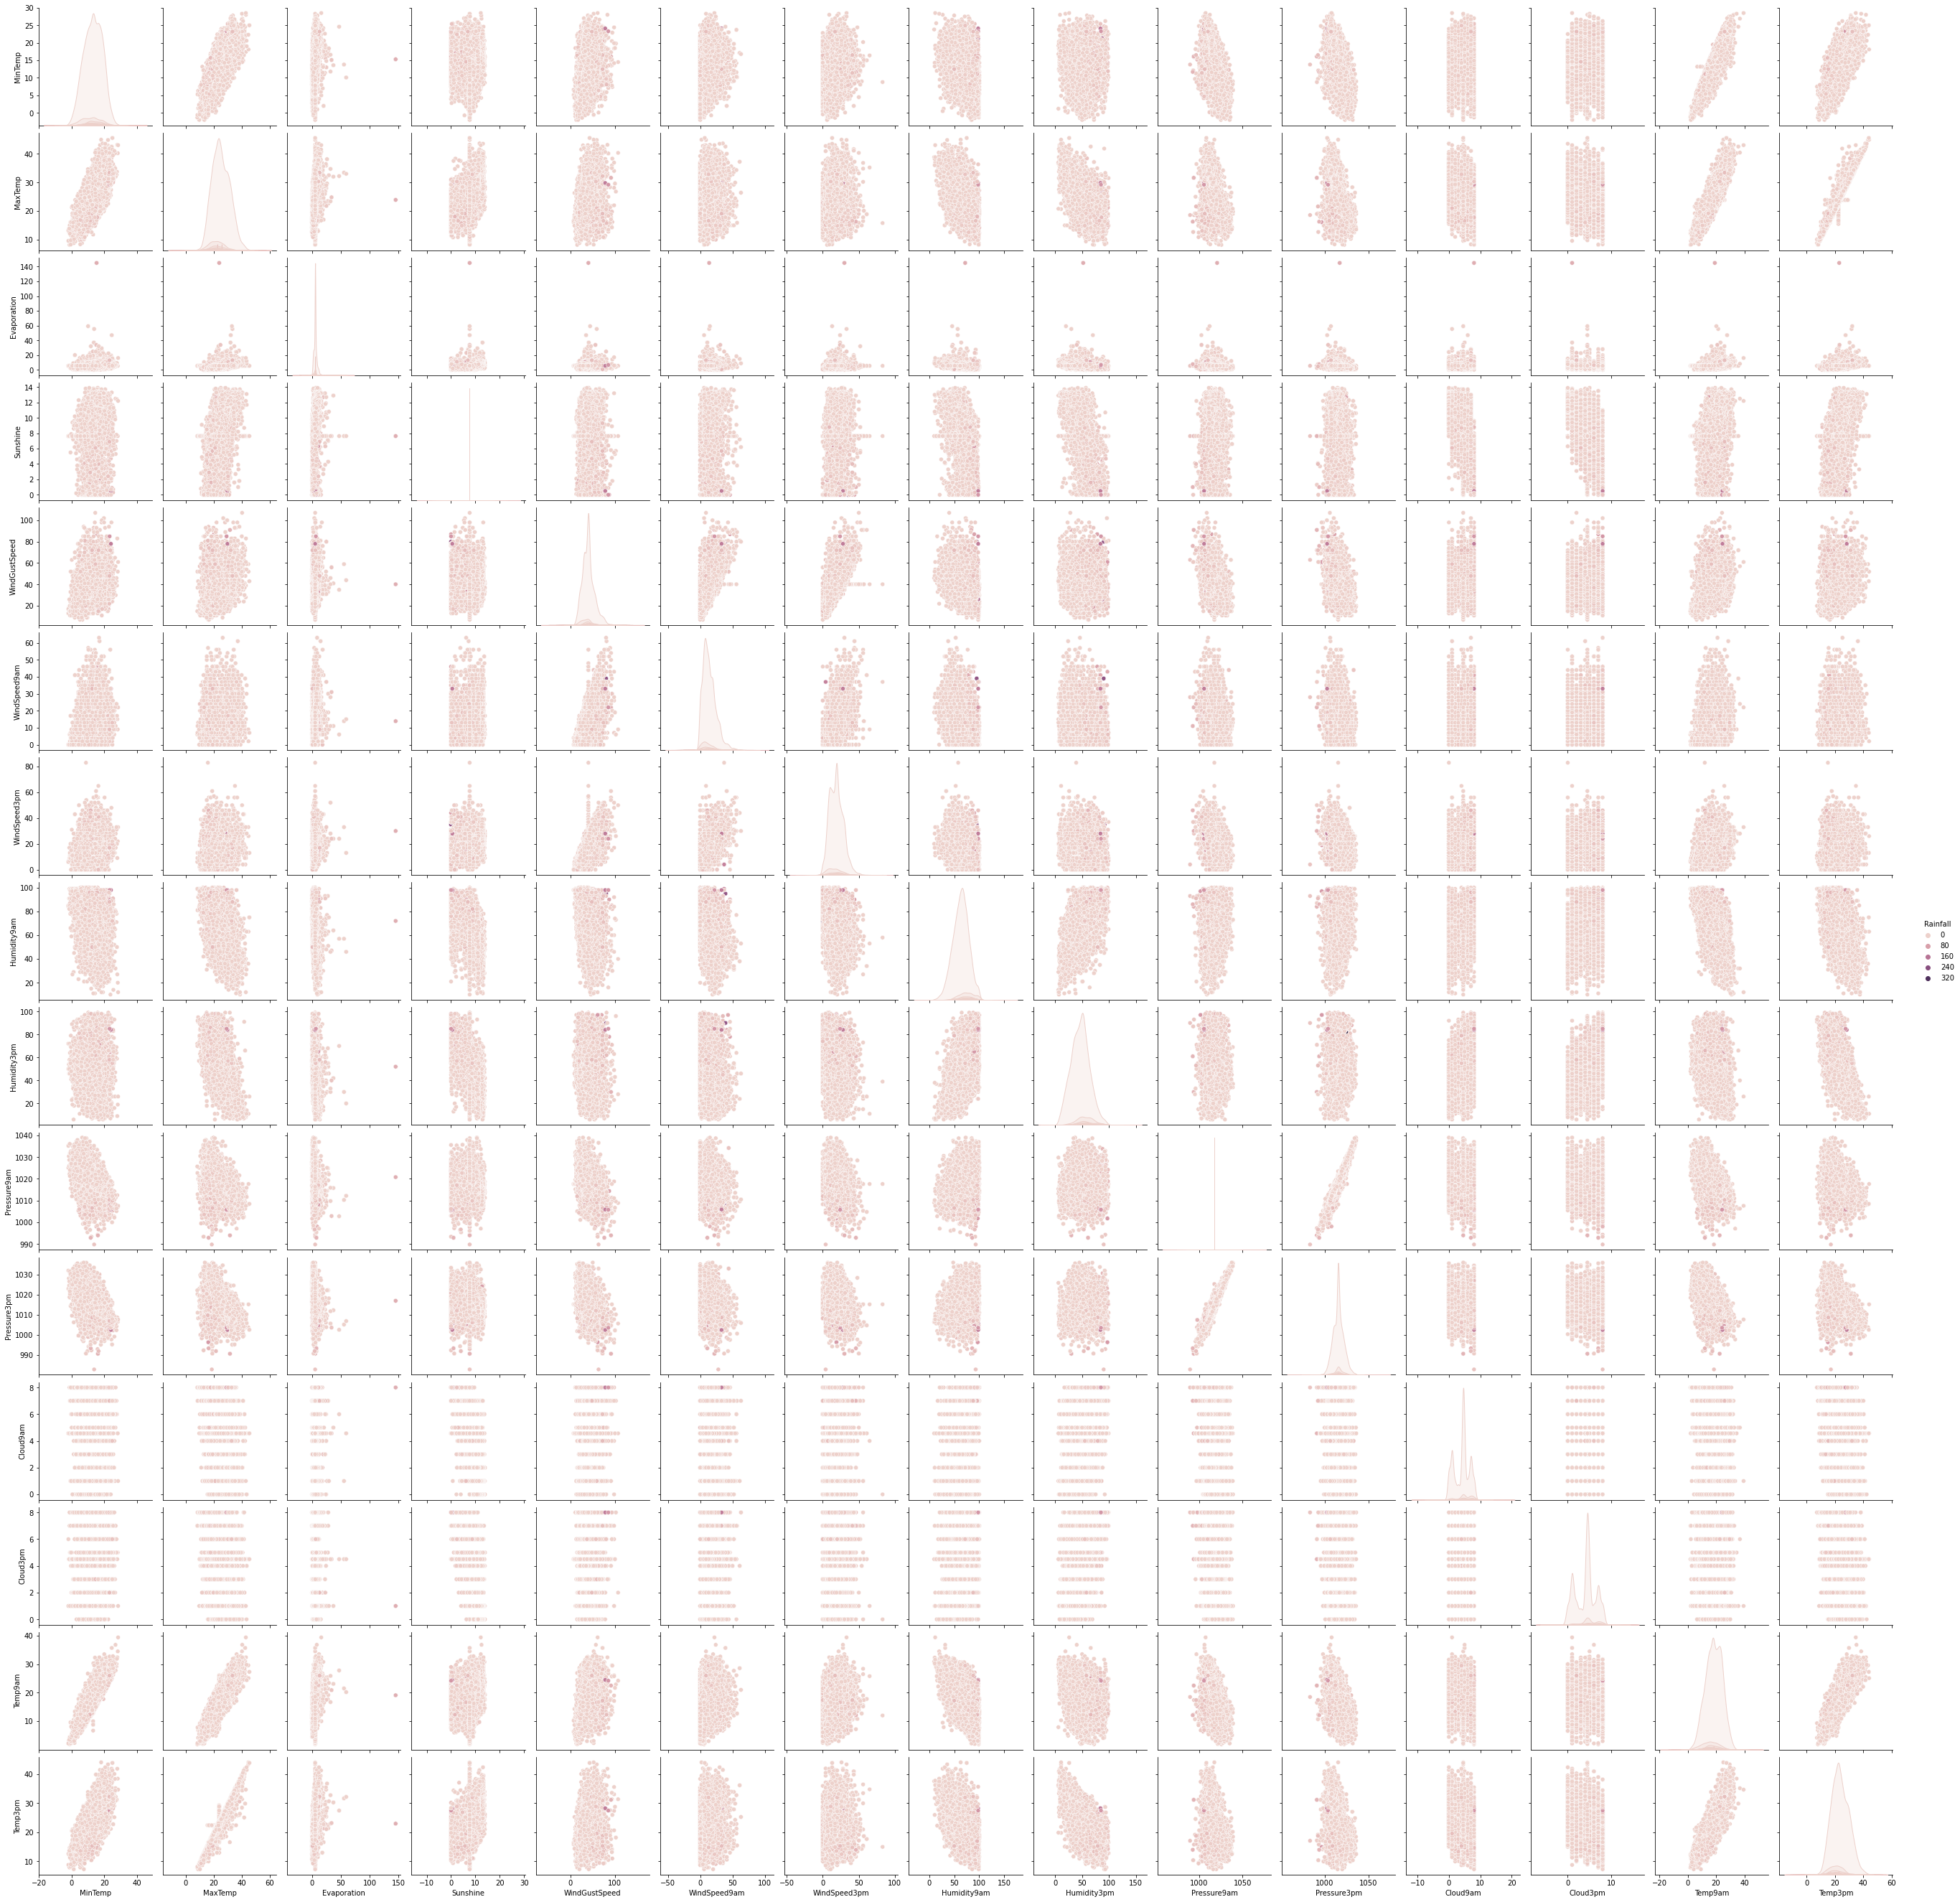

In [61]:
# For checking correlation between all the columns in dataset using pairplot method:
sns.pairplot(data,hue="Rainfall")

# Removal of Outliers:-

<AxesSubplot:>

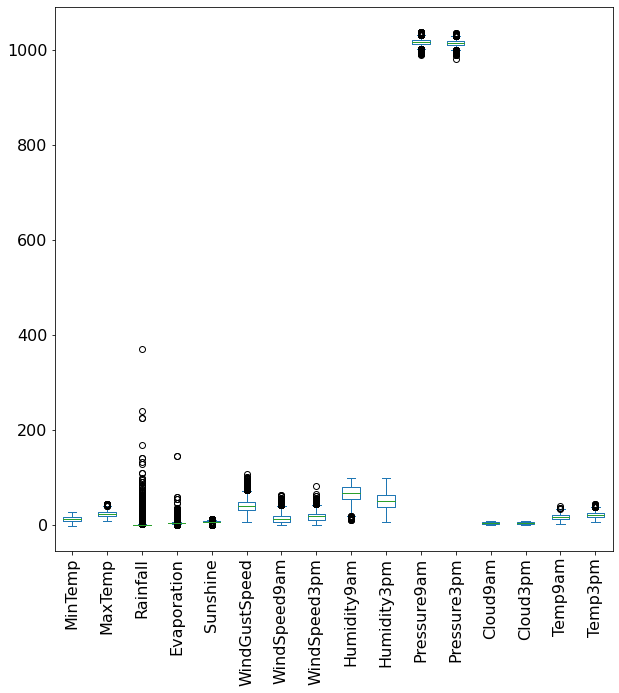

In [62]:
# For Checking outliers using boxplot method:
data.plot(kind="box", figsize=(10,10),fontsize=16, rot=90)

Here, mostly columns are having outliers in it except 2-3 columns 
and column Rainfall are also having outliers so it wont be removed
because its a Target column and as per SOP.s it should not be removed.

In [68]:
# For removing outliers:-
# For seperating outlier columns in a seperate list:-
outliers=data[['MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Temp9am','Temp3pm']]

In [69]:
# Forimporting required libraries for zscore:-
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data1=data[(z<3).all(axis=1)]
data1

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0      Albury     13.4  22.900000       0.6     5.389395  7.632205   
1      Albury      7.4  25.100000       0.0     5.389395  7.632205   
2      Albury     12.9  25.700000       0.0     5.389395  7.632205   
3      Albury      9.2  28.000000       0.0     5.389395  7.632205   
4      Albury     17.5  32.300000       1.0     5.389395  7.632205   
...       ...      ...        ...       ...          ...       ...   
8420    Uluru      2.8  23.400000       0.0     5.389395  7.632205   
8421    Uluru      3.6  25.300000       0.0     5.389395  7.632205   
8422    Uluru      5.4  26.900000       0.0     5.389395  7.632205   
8423    Uluru      7.8  27.000000       0.0     5.389395  7.632205   
8424    Uluru     14.9  23.859976       0.0     5.389395  7.632205   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0              W      44.000000          W        WNW  ...         71.0   
1            WNW      44.000000        NNW        WSW  ...         44.0   
2            WSW      46.000000          W        WSW  ...         38.0   
3             NE      24.000000         SE          E  ...         45.0   
4              W      41.000000        ENE         NW  ...         82.0   
...          ...            ...        ...        ...  ...          ...   
8420           E      31.000000         SE        ENE  ...         51.0   
8421         NNW      22.000000         SE          N  ...         56.0   
8422           N      37.000000         SE        WNW  ...         53.0   
8423          SE      28.000000        SSE          N  ...         51.0   
8424           N      40.174469        ESE        ESE  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1            25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2            30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3            16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4            33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183     10.1   
8421         21.0       1023.5       1019.1  4.566622  4.503183     10.9   
8422         24.0       1021.0       1016.8  4.566622  4.503183     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8         No            No  
1        24.3         No            No  
2        23.2         No            No  
3        26.5         No            No  
4        29.7         No            No  
...       ...        ...           ...  
8420     22.4         No            No  
8421     24.5         No            No  
8422     26.1         No            No  
8423     26.0         No            No  
8424     20.9         No            No  

[8151 rows x 22 columns]

Here, as seen above the outliers has been removed  properly.

In [70]:
# For checking the shape of the dataset:-
data1.shape

(8151, 22)

In [71]:
# For Checking the Percentage of dataloss using zscore method:-
dataloss=(((data.shape[0]-data1.shape[0])/data.shape[0])*100)
dataloss

3.2522255192878338

Here, the dataloss is 3.2 % which is under acceptable limit.

In [72]:
# For checking skewness levels in columns:-
data1.skew()

MinTemp          -0.087605
MaxTemp           0.327786
Rainfall         13.494777
Evaporation       0.841403
Sunshine         -0.731435
WindGustSpeed     0.512046
WindSpeed9am      0.710076
WindSpeed3pm      0.306662
Humidity9am      -0.238676
Humidity3pm       0.129166
Pressure9am       0.020961
Pressure3pm       0.036036
Cloud9am         -0.365132
Cloud3pm         -0.274032
Temp9am          -0.033374
Temp3pm           0.345698
dtype: float64

In [74]:
# For removing skewness using Log Transformation method:-
data1["Sunshine"] = np.log1p(data1["Sunshine"])
data1["Rainfall"] = np.log1p(data1["Rainfall"])
data1["Evaporation"] = np.log1p(data1["Evaporation"])
data1["WindSpeed9am"] = np.log1p(data1["WindSpeed9am"])
data1["WindGustSpeed"] = np.log1p(data1["WindGustSpeed"])

In [75]:
# For checking skewness again after removal:-
data1.skew()

MinTemp         -0.087605
MaxTemp          0.327786
Rainfall         1.410996
Evaporation     -1.788617
Sunshine        -3.185963
WindGustSpeed   -0.517941
WindSpeed9am    -1.982484
WindSpeed3pm     0.306662
Humidity9am     -0.238676
Humidity3pm      0.129166
Pressure9am      0.020961
Pressure3pm      0.036036
Cloud9am        -0.365132
Cloud3pm        -0.274032
Temp9am         -0.033374
Temp3pm          0.345698
dtype: float64

Here,  mostly the skewness has been removed from all the columns.

# Label Encoding:-

In [77]:
print(Category)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [76]:
# Importing required libraries:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1[Category]=data1[Category].apply(le.fit_transform)
data1[Category].head()

Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
0         1           13          13          14          0             0
1         1           14           6          15          0             0
2         1           15          13          15          0             0
3         1            4           9           0          0             0
4         1           13           1           7          0             0

As seen above, the categorical data has been converted into numerical data for proceeding ahead.

In [78]:
# For checking correlation in the new dataset:-
corr=data1.corr()
corr

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.113859  0.062893  0.008625     0.117764  0.077532   
MinTemp        0.113859  1.000000  0.716281  0.091388     0.333670 -0.022519   
MaxTemp        0.062893  0.716281  1.000000 -0.224385     0.432280  0.274829   
Rainfall       0.008625  0.091388 -0.224385  1.000000    -0.144870 -0.212957   
Evaporation    0.117764  0.333670  0.432280 -0.144870     1.000000  0.314008   
Sunshine       0.077532 -0.022519  0.274829 -0.212957     0.314008  1.000000   
WindGustDir   -0.038633 -0.150563 -0.234722  0.124492    -0.104673 -0.057861   
WindGustSpeed  0.259253  0.264371  0.158980  0.097086     0.137489 -0.011172   
WindDir9am    -0.036317 -0.039598 -0.214274  0.161206    -0.076519 -0.047083   
WindDir3pm    -0.028698 -0.153664 -0.190858  0.108191    -0.036147 -0.034955   
WindSpeed9am   0.181689  0.176881  0.050922  0.021286    -0.026288 -0.072486   
WindSpeed3pm   0.230491  0.184848  0.089616  0.026927     0.055680 -0.000939   
Humidity9am    0.003862 -0.119427 -0.383303  0.406602    -0.265656 -0.246914   
Humidity3pm    0.059179  0.098505 -0.406612  0.394433    -0.197472 -0.377288   
Pressure9am   -0.020978 -0.431947 -0.325722 -0.119553    -0.243504  0.029051   
Pressure3pm   -0.009951 -0.426342 -0.404392 -0.043206    -0.258562 -0.012205   
Cloud9am       0.040877  0.096729 -0.252733  0.311016    -0.086554 -0.390355   
Cloud3pm       0.023361  0.043424 -0.248511  0.272036    -0.125402 -0.413068   
Temp9am        0.115432  0.888257  0.864173 -0.081772     0.400754  0.137485   
Temp3pm        0.059354  0.684799  0.974823 -0.234859     0.422299  0.288712   
RainToday      0.001548  0.073463 -0.221048  0.933724    -0.150616 -0.188060   
RainTomorrow   0.005481  0.097677 -0.152622  0.345307    -0.076228 -0.282717   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.038633       0.259253   -0.036317   -0.028698  ...   
MinTemp          -0.150563       0.264371   -0.039598   -0.153664  ...   
MaxTemp          -0.234722       0.158980   -0.214274   -0.190858  ...   
Rainfall          0.124492       0.097086    0.161206    0.108191  ...   
Evaporation      -0.104673       0.137489   -0.076519   -0.036147  ...   
Sunshine         -0.057861      -0.011172   -0.047083   -0.034955  ...   
WindGustDir       1.000000       0.001928    0.403932    0.505942  ...   
WindGustSpeed     0.001928       1.000000   -0.055761    0.086895  ...   
WindDir9am        0.403932      -0.055761    1.000000    0.245576  ...   
WindDir3pm        0.505942       0.086895    0.245576    1.000000  ...   
WindSpeed9am      0.122956       0.369968    0.254456    0.019995  ...   
WindSpeed3pm      0.109444       0.626863    0.060879    0.081226  ...   
Humidity9am       0.030745      -0.273077    0.015225   -0.005978  ...   
Humidity3pm       0.050724      -0.078119    0.121567   -0.008403  ...   
Pressure9am      -0.104098      -0.370293   -0.010279   -0.129563  ...   
Pressure3pm      -0.020292      -0.329114    0.072957   -0.039533  ...   
Cloud9am          0.123809       0.009780    0.097382    0.073682  ...   
Cloud3pm          0.094994       0.059544    0.064982    0.052761  ...   
Temp9am          -0.181699       0.235637   -0.097971   -0.172786  ...   
Temp3pm          -0.247134       0.124591   -0.221257   -0.202825  ...   
RainToday         0.123142       0.084938    0.155940    0.098995  ...   
RainTomorrow      0.047081       0.172335    0.033261    0.006011  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Location          0.003862     0.059179    -0.020978    -0.009951  0.040877   
MinTemp          -0.119427     0.098505    -0.431947    -0.426342  0.096729   
MaxTemp          -0.383303    -0.406612    -0.325722    -0.404392 -0.252733   
Rainfall          0.406602     0.394433    -0.119553    -0.043206  0.311016   
Evaporation      -0.265656    -0.197472    -0.243504    -0.258562 -0.086554 

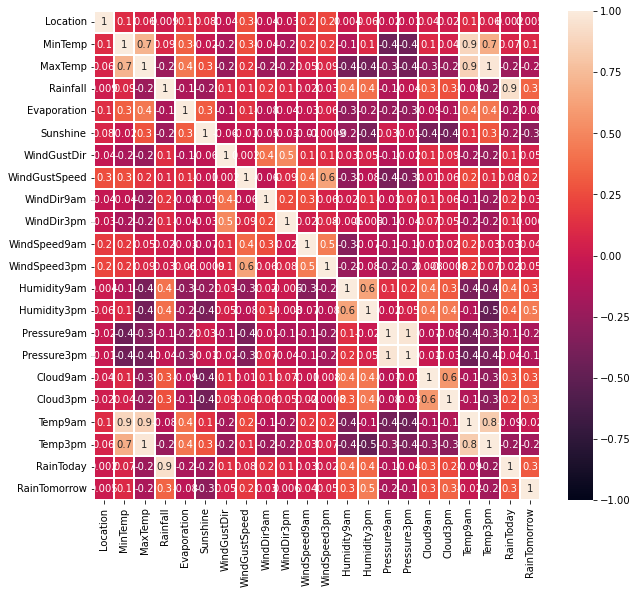

In [79]:
# For visualising correlation in all columns using heatmap method:-
plt.figure(figsize=(10,9))
sns.heatmap(data1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True,annot_kws={'size':10})
plt.yticks(rotation=0);

In [1]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Data Scaling:-

In [84]:
# For splitting features and label :-
x = data1.drop("RainTomorrow", axis=1)
y = data1["RainTomorrow"]

In [85]:
# For scaling the data using Standard Scaler:-
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.507312  0.054219 -0.137205  0.213754     0.323039  0.221982   
1    -1.507312 -1.061936  0.230093 -0.605246     0.323039  0.221982   
2    -1.507312 -0.038794  0.330266 -0.605246     0.323039  0.221982   
3    -1.507312 -0.727090  0.714259 -0.605246     0.323039  0.221982   
4    -1.507312  0.816926  1.432160  0.514182     0.323039  0.221982   
...        ...       ...       ...       ...          ...       ...   
8146  1.030549 -1.917656 -0.053728 -0.605246     0.323039  0.221982   
8147  1.030549 -1.768835  0.263484 -0.605246     0.323039  0.221982   
8148  1.030549 -1.433988  0.530610 -0.605246     0.323039  0.221982   
8149  1.030549 -0.987526  0.547305 -0.605246     0.323039  0.221982   
8150  1.030549  0.333258  0.023067 -0.605246     0.323039  0.221982   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
0        1.226754       0.477864    1.245827    1.399311  ...      0.636029   
1        1.439491       0.477864   -0.280971    1.625765  ...      0.419968   
2        1.652228       0.607786    1.245827    1.625765  ...      0.852090   
3       -0.687878      -1.278291    0.373371   -1.771038  ...     -0.984429   
4        1.226754       0.271731   -1.371541   -0.185864  ...      0.203907   
...           ...            ...         ...         ...  ...           ...   
8146    -1.538826      -0.540737    0.373371   -1.544585  ...     -0.768368   
8147    -0.262404      -1.527414    0.373371   -1.091678  ...     -0.984429   
8148    -0.900615      -0.027293    0.373371    1.399311  ...     -0.984429   
8149     0.375807      -0.834851    0.591485   -1.091678  ...     -1.200490   
8150    -0.900615       0.212420   -1.153427   -1.318131  ...     -0.120185   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0        0.166377    -1.629681    -1.634079    -1.357653  1.408857  0.001143   
1       -1.464795    -1.464415    -1.165187    -1.243305 -0.001474  0.001143   
2       -1.827278    -1.188970    -1.650247    -1.096287 -0.001474 -1.085526   
3       -1.404381    -1.960215    -0.033378    -0.426536 -0.001474  0.001143   
4        0.830928    -1.023703    -1.132849    -1.537342  0.998086  1.519163   
...           ...          ...          ...          ...       ...       ...   
8146    -1.041899    -1.519503     1.098430     0.798618 -0.001474  0.001143   
8147    -0.739830    -1.684770     0.920574     0.602593 -0.001474  0.001143   
8148    -0.921071    -1.519503     0.516357     0.226879 -0.001474  0.001143   
8149    -1.041899    -1.519503     0.257658     0.177873 -0.644997 -1.085526   
8150    -0.377347    -0.858437     0.387007     0.406569  1.408857  1.519163   

       Temp9am   Temp3pm  RainToday  
0    -0.133013 -0.089289  -0.559449  
1    -0.079130  0.340165  -0.559449  
2     0.603399  0.151206  -0.559449  
3     0.082522  0.718085  -0.559449  
4     0.028638  1.267786  -0.559449  
...        ...       ...        ...  
8146 -1.354381  0.013780  -0.559449  
8147 -1.210690  0.374522  -0.559449  
8148 -0.923310  0.649372  -0.559449  
8149 -0.456316  0.632194  -0.559449  
8150 -0.474278 -0.243892  -0.559449  

[8151 rows x 21 columns]

In [86]:
# For checking Multicollinearity using Variance Inflation factor:-
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     1.171204       Location
1     8.226440        MinTemp
2    26.202876        MaxTemp
3     8.391041       Rainfall
4     1.419242    Evaporation
5     1.490574       Sunshine
6     1.603411    WindGustDir
7     2.137510  WindGustSpeed
8     1.413213     WindDir9am
9     1.481948     WindDir3pm
10    1.609450   WindSpeed9am
11    1.915618   WindSpeed3pm
12    3.831897    Humidity9am
13    5.400628    Humidity3pm
14   20.784413    Pressure9am
15   19.790638    Pressure3pm
16    1.864728       Cloud9am
17    1.728767       Cloud3pm
18   16.801139        Temp9am
19   32.755020        Temp3pm
20    7.878272      RainToday

In [97]:
# For removing the highly collinear column as it will affect model performance further:-
x.drop("MaxTemp",axis=1,inplace=True)

In [98]:
# For checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values       Features
0     1.167530       Location
1     8.148912        MinTemp
2     8.369741       Rainfall
3     1.401543    Evaporation
4     1.481450       Sunshine
5     1.599535    WindGustDir
6     2.124987  WindGustSpeed
7     1.399870     WindDir9am
8     1.480533     WindDir3pm
9     1.605405   WindSpeed9am
10    1.900125   WindSpeed3pm
11    2.912033    Humidity9am
12    2.173952    Humidity3pm
13   19.313119    Pressure9am
14   18.334779    Pressure3pm
15    1.854225       Cloud9am
16    1.711315       Cloud3pm
17    8.972402        Temp9am
18    7.868797      RainToday

In [99]:
# For dropping Pressure9am :-
x.drop("Pressure9am",axis=1,inplace=True)

In [100]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values       Features
0     1.167493       Location
1     7.984447        MinTemp
2     8.344298       Rainfall
3     1.397938    Evaporation
4     1.481051       Sunshine
5     1.581311    WindGustDir
6     2.111523  WindGustSpeed
7     1.367205     WindDir9am
8     1.416062     WindDir3pm
9     1.595464   WindSpeed9am
10    1.871338   WindSpeed3pm
11    2.887035    Humidity9am
12    2.130148    Humidity3pm
13    1.410966    Pressure3pm
14    1.854027       Cloud9am
15    1.709328       Cloud3pm
16    8.845349        Temp9am
17    7.868774      RainToday

So , now all the columns are well under limit.

# Data Balancing:-

In [101]:
# For checking value counts of Target variable:-
y.value_counts()

0    6233
1    1918
Name: RainTomorrow, dtype: int64

In [102]:
# For balancing data using oversampling ( SMOTE) technique:-
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [103]:
# For checking value_counts again:-
y.value_counts()

0    6233
1    6233
Name: RainTomorrow, dtype: int64

# Finding the Best Random State:-

In [104]:
MaxAccu=0
MaxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    Model = RandomForestClassifier()
    Model.fit(x_train, y_train)
    pred = Model.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best accuracy is ",MaxAccu," on Random_state ",MaxRS)

Best accuracy is  0.9409090909090909  on Random_state  57


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=57)

# Classification Model Building for Rainfall Tomorrow Target Variable:-

In [106]:
# For checking with Logestic Regression as it supports Binary Classification also:-
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7780748663101604
[[1461  406]
 [ 424 1449]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1867
           1       0.78      0.77      0.78      1873

    accuracy                           0.78      3740
   macro avg       0.78      0.78      0.78      3740
weighted avg       0.78      0.78      0.78      3740



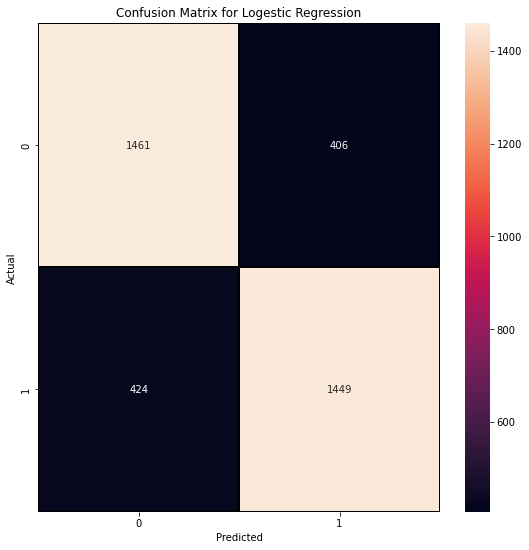

In [111]:
# For checking confusion matrix for LR:-
CM= confusion_matrix(y_test,predlr)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logestic Regression")
plt.show()

In [109]:
# For checking with 2nd Model:- RandomForestClassifier:-
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9379679144385027
[[1741  126]
 [ 106 1767]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1867
           1       0.93      0.94      0.94      1873

    accuracy                           0.94      3740
   macro avg       0.94      0.94      0.94      3740
weighted avg       0.94      0.94      0.94      3740



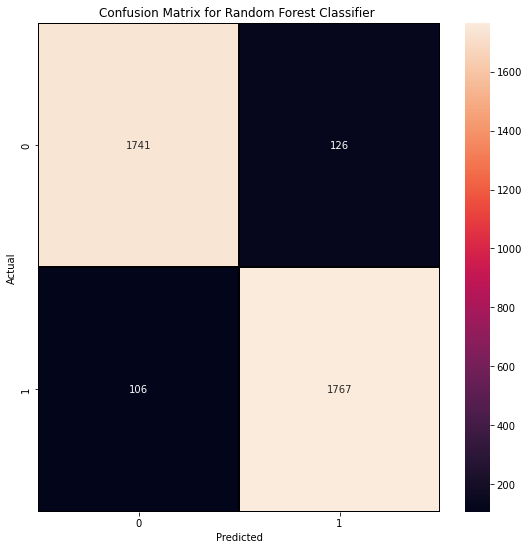

In [112]:
# For checking confusion matrix for RandomForest:-
CM= confusion_matrix(y_test,predrf)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier ")
plt.show()

In [114]:
# For checking with 3rd Model:-GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8483957219251337
[[1574  293]
 [ 274 1599]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1867
           1       0.85      0.85      0.85      1873

    accuracy                           0.85      3740
   macro avg       0.85      0.85      0.85      3740
weighted avg       0.85      0.85      0.85      3740



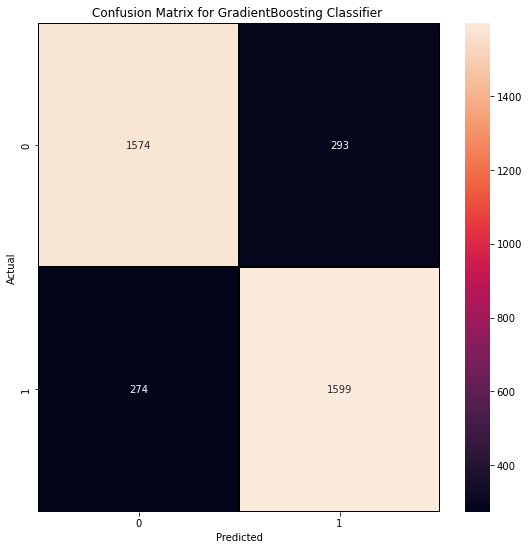

In [115]:
# For checking confusion matrix for RandomForest:-
CM1= confusion_matrix(y_test,predgb)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM1, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GradientBoosting Classifier ")
plt.show()

In [116]:
# For checking with 4th Model:- AdaBoostClassifier:-
Abc = AdaBoostClassifier()
Abc.fit(x_train,y_train)
predabc = Abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.820855614973262
[[1517  350]
 [ 320 1553]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1867
           1       0.82      0.83      0.82      1873

    accuracy                           0.82      3740
   macro avg       0.82      0.82      0.82      3740
weighted avg       0.82      0.82      0.82      3740



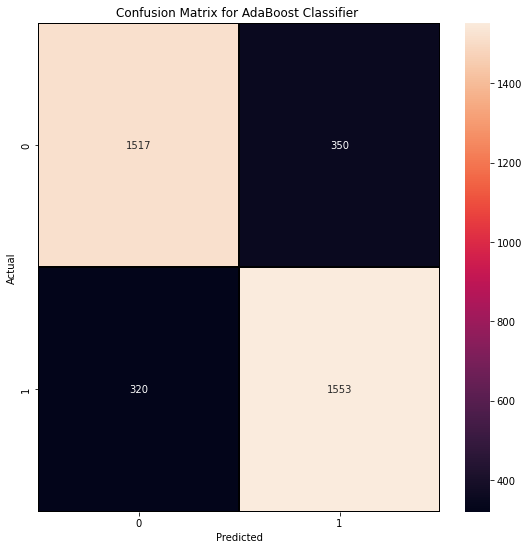

In [118]:
# For checking confusion matrix for AdaBoostClassifier:-
CM1= confusion_matrix(y_test,predabc)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM1, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for AdaBoost Classifier ")
plt.show()

In [119]:
# For checking accuracy with 5th Model:- ExtraTreesClassifier:-
Extra = ExtraTreesClassifier()
Extra.fit(x_train,y_train)
predxtc = Extra.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.9443850267379679
[[1731  136]
 [  72 1801]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1867
           1       0.93      0.96      0.95      1873

    accuracy                           0.94      3740
   macro avg       0.94      0.94      0.94      3740
weighted avg       0.94      0.94      0.94      3740



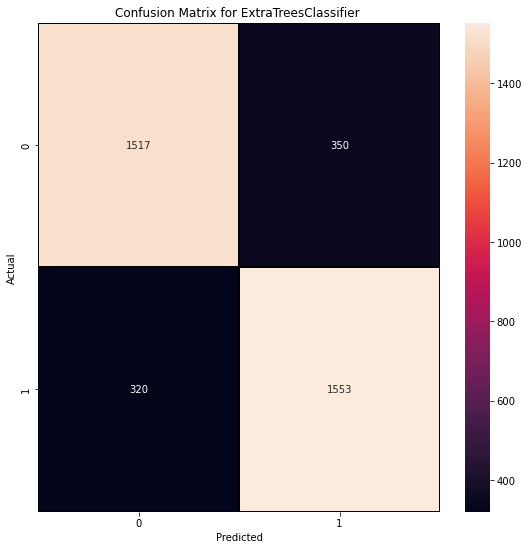

In [120]:
# For checking confusion matrix for ExtraTreesClassifier:-
CM2= confusion_matrix(y_test,predabc)

x_axis_labels= ["Yes","No"]
y_axis_labels=["Yes","No"]

f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(CM2, annot=True, linewidth=0.2, linecolor="black", fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for ExtraTreesClassifier ")
plt.show()

# CROSS VALIDATION PHASE:-

In [122]:
# Cv score for Logistic Regression:-
print('Logistic Regression:',cross_val_score(Lr,x,y,cv=5).mean())

# Cv score for Random Forest Classifier:-
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# Cv score for AdaBoosting Classifier:-
print('AdaBoosting Classifier:',cross_val_score(Abc,x,y,cv=5).mean())

# Cv score for Gradient Boosting Classifier:-
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for Extra Trees Classifier:-
print('Extra Trees Classifier:',cross_val_score(Extra,x,y,cv=5).mean())

Logistic Regression: 0.7267802613959021
Random Forest Classifier: 0.8210385068568897
AdaBoosting Classifier: 0.6584358899384998
Gradient Boosting Classifier: 0.6589181705567891
Extra Trees Classifier: 0.8437399538274128


So, the best and Final Model is ExtraTrees Classifier with accuracy score of 94.4 %

# Hyper Parameter Tuning Using Grid Search CV:-

In [126]:
# For defining parameters:-
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [127]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [128]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [129]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [130]:
FinalModel=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=300, n_jobs=-2, random_state=50)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.68983957219251


# Plotting ROC/AUC CURVE:-

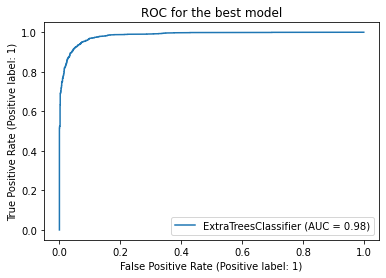

In [131]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving Model:-

In [132]:
# For importing required libraries and saving the model using pickle:-
import pickle
Name='RainfallTomorrow'
pickle.dump(FinalModel,open(Name,'wb'))

# Loading Model:-

In [133]:
# loading the saved model and fetching the predictions by the model:-
LoadedModel=pickle.load(open('RainfallTomorrow','rb'))
Result=LoadedModel.predict(x_test)
print(Result)

[1 0 1 ... 0 1 0]


In [136]:
pd.DataFrame([FinalModel.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"]).T

Predicted  Actual
0             1       1
1             0       0
2             1       1
3             1       1
4             1       1
...         ...     ...
3735          1       1
3736          1       1
3737          0       0
3738          1       1
3739          0       0

[3740 rows x 2 columns]

# Now Prediction for 2nd Target Column:Rainfall

In [137]:
# Fetching the dataset:-
data1.head(n=6)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9  0.385265     1.048946  1.149147           13   
1         1      7.4     25.1  0.000000     1.048946  1.149147           14   
2         1     12.9     25.7  0.000000     1.048946  1.149147           15   
3         1      9.2     28.0  0.000000     1.048946  1.149147            4   
4         1     17.5     32.3  0.526589     1.048946  1.149147           13   
5         1     14.6     29.7  0.167480     1.048946  1.149147           14   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0       3.806662          13          14  ...         71.0         22.0   
1       3.806662           6          15  ...         44.0         25.0   
2       3.850148          13          15  ...         38.0         30.0   
3       3.218876           9           0  ...         45.0         16.0   
4       3.737670           1           7  ...         82.0         33.0   
5       4.043051          13          13  ...         55.0         23.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8          0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3          0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   
5       1009.2       1005.4  4.566622  4.503183     20.6     28.9          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  

[6 rows x 22 columns]

In [142]:
x1 = data1.drop("Rainfall", axis=1)
y1 = data1["Rainfall"]

In [143]:
# For scaling the data:-
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x1

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0    -1.507312  0.054219 -0.137205     0.323039  0.221982     1.226754   
1    -1.507312 -1.061936  0.230093     0.323039  0.221982     1.439491   
2    -1.507312 -0.038794  0.330266     0.323039  0.221982     1.652228   
3    -1.507312 -0.727090  0.714259     0.323039  0.221982    -0.687878   
4    -1.507312  0.816926  1.432160     0.323039  0.221982     1.226754   
...        ...       ...       ...          ...       ...          ...   
8146  1.030549 -1.917656 -0.053728     0.323039  0.221982    -1.538826   
8147  1.030549 -1.768835  0.263484     0.323039  0.221982    -0.262404   
8148  1.030549 -1.433988  0.530610     0.323039  0.221982    -0.900615   
8149  1.030549 -0.987526  0.547305     0.323039  0.221982     0.375807   
8150  1.030549  0.333258  0.023067     0.323039  0.221982    -0.900615   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0          0.477864    1.245827    1.399311      0.626261  ...     0.166377   
1          0.477864   -0.280971    1.625765     -0.459217  ...    -1.464795   
2          0.607786    1.245827    1.625765      0.596199  ...    -1.827278   
3         -1.278291    0.373371   -1.771038      0.257386  ...    -1.404381   
4          0.271731   -1.371541   -0.185864     -0.048998  ...     0.830928   
...             ...         ...         ...           ...  ...          ...   
8146      -0.540737    0.373371   -1.544585      0.364597  ...    -1.041899   
8147      -1.527414    0.373371   -1.091678      0.364597  ...    -0.739830   
8148      -0.027293    0.373371    1.399311      0.124284  ...    -0.921071   
8149      -0.834851    0.591485   -1.091678      0.364597  ...    -1.041899   
8150       0.212420   -1.153427   -1.318131      0.530009  ...    -0.377347   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.629681    -1.634079    -1.357653  1.408857  0.001143 -0.133013   
1       -1.464415    -1.165187    -1.243305 -0.001474  0.001143 -0.079130   
2       -1.188970    -1.650247    -1.096287 -0.001474 -1.085526  0.603399   
3       -1.960215    -0.033378    -0.426536 -0.001474  0.001143  0.082522   
4       -1.023703    -1.132849    -1.537342  0.998086  1.519163  0.028638   
...           ...          ...          ...       ...       ...       ...   
8146    -1.519503     1.098430     0.798618 -0.001474  0.001143 -1.354381   
8147    -1.684770     0.920574     0.602593 -0.001474  0.001143 -1.210690   
8148    -1.519503     0.516357     0.226879 -0.001474  0.001143 -0.923310   
8149    -1.519503     0.257658     0.177873 -0.644997 -1.085526 -0.456316   
8150    -0.858437     0.387007     0.406569  1.408857  1.519163 -0.474278   

       Temp3pm  RainToday  RainTomorrow  
0    -0.089289  -0.559449     -0.554722  
1     0.340165  -0.559449     -0.554722  
2     0.151206  -0.559449     -0.554722  
3     0.718085  -0.559449     -0.554722  
4     1.267786  -0.559449     -0.554722  
...        ...        ...           ...  
8146  0.013780  -0.559449     -0.554722  
8147  0.374522  -0.559449     -0.554722  
8148  0.649372  -0.559449     -0.554722  
8149  0.632194  -0.559449     -0.554722  
8150 -0.243892  -0.559449     -0.554722  

[8151 rows x 21 columns]

In [144]:
# Checking Multicollinearity:-
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif["Features"] = x1.columns
vif

VIF values       Features
0     1.175989       Location
1     8.243238        MinTemp
2    26.159856        MaxTemp
3     1.419788    Evaporation
4     1.499818       Sunshine
5     1.604765    WindGustDir
6     2.192433  WindGustSpeed
7     1.411669     WindDir9am
8     1.482142     WindDir3pm
9     1.610982   WindSpeed9am
10    1.918543   WindSpeed3pm
11    3.778573    Humidity9am
12    5.630154    Humidity3pm
13   20.773525    Pressure9am
14   19.838284    Pressure3pm
15    1.864454       Cloud9am
16    1.746239       Cloud3pm
17   16.780551        Temp9am
18   32.730989        Temp3pm
19    1.389358      RainToday
20    1.448953   RainTomorrow

In [145]:
# For Dropping MaxTemp column to reduce multicollinearity:-
x1.drop("MaxTemp",axis=1,inplace=True)

In [146]:
# For checking vif again:-
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif["Features"] = x1.columns
vif

VIF values       Features
0     1.172610       Location
1     8.225150        MinTemp
2     1.418396    Evaporation
3     1.491428       Sunshine
4     1.604054    WindGustDir
5     2.182574  WindGustSpeed
6     1.408288     WindDir9am
7     1.480786     WindDir3pm
8     1.610934   WindSpeed9am
9     1.917914   WindSpeed3pm
10    3.759647    Humidity9am
11    5.532878    Humidity3pm
12   20.770047    Pressure9am
13   19.837219    Pressure3pm
14    1.858560       Cloud9am
15    1.729845       Cloud3pm
16   16.361839        Temp9am
17   11.912293        Temp3pm
18    1.383450      RainToday
19    1.448091   RainTomorrow

In [147]:
# For Dropping Pressure9am column:-
x1.drop("Pressure9am",axis=1,inplace=True)

In [148]:
# For checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif["Features"] = x1.columns
vif

VIF values       Features
0     1.172514       Location
1     8.022624        MinTemp
2     1.409585    Evaporation
3     1.491189       Sunshine
4     1.590504    WindGustDir
5     2.166804  WindGustSpeed
6     1.386078     WindDir9am
7     1.421094     WindDir3pm
8     1.598526   WindSpeed9am
9     1.901733   WindSpeed3pm
10    3.747008    Humidity9am
11    5.472338    Humidity3pm
12    1.429457    Pressure3pm
13    1.858552       Cloud9am
14    1.727357       Cloud3pm
15   16.214203        Temp9am
16   11.076584        Temp3pm
17    1.370597      RainToday
18    1.445390   RainTomorrow

In [150]:
#  For Dropping Temp9am column to balance multicollinearity:-
x1.drop("Temp9am",axis=1,inplace=True)

In [152]:
# For checking vif finally to check balance:-
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif["Features"] = x1.columns
vif

VIF values       Features
0     1.166632       Location
1     4.819097        MinTemp
2     1.408355    Evaporation
3     1.485587       Sunshine
4     1.587864    WindGustDir
5     2.143741  WindGustSpeed
6     1.385190     WindDir9am
7     1.420980     WindDir3pm
8     1.594020   WindSpeed9am
9     1.869726   WindSpeed3pm
10    2.423723    Humidity9am
11    3.919761    Humidity3pm
12    1.421601    Pressure3pm
13    1.832414       Cloud9am
14    1.727124       Cloud3pm
15    6.047845        Temp3pm
16    1.366227      RainToday
17    1.445273   RainTomorrow

So, now all the features are balanced and issue of multicollinearity has been resolved.

# Finding the Best Random State:-

In [154]:
# For finding the Best Random state for Rainfall column:-
MaxAccu1=0
MaxRS1=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30, random_state=i)
    Model = RandomForestRegressor()
    Model.fit(x_train, y_train)
    pred = Model.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>MaxAccu1:
        MaxAccu1=acc
        MaxRS1=i
print("Maximum r2 score is ",MaxAccu1," on Random_state ",MaxRS1)

Maximum r2 score is  0.9209278874644277  on Random_state  12


In [155]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=12)

# Regression Model Building:-

In [156]:
# For checking with 1st Model:-Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))

# Metric evaluation for model:-
print('MAE:',metrics.mean_absolute_error(y_test, predrf))
print('MSE:',metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 0.9202711008230093
MAE: 0.07915803921508065
MSE: 0.017657470071359666
RMSE: 0.1328814135662308


In [157]:
# For checking with 2nd Model:-Decision Tree Regressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print('R2_Score:',r2_score(y_test,preddt))

# Metric evaluation for model:-
print('MAE:',metrics.mean_absolute_error(y_test, preddt))
print('MSE:',metrics.mean_squared_error(y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddt)))

R2_Score: 0.8486167387260808
MAE: 0.08425033388094871
MSE: 0.033526681452294246
RMSE: 0.18310292584307397


In [158]:
# For checking with 3rd Model:-BaggingRegressor
br=BaggingRegressor()
br.fit(x_train,y_train)
predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Metric Evaluation for model:-
print('MAE:',metrics.mean_absolute_error(y_test, predbr))
print('MSE:',metrics.mean_squared_error(y_test, predbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.910067409318646
MAE: 0.08198314940621376
MSE: 0.019917270209271008
RMSE: 0.14112855915537084


In [159]:
# For checking with 4th Model:-GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Metric Evaluation for model:-
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.9015341946752307
MAE: 0.09180594207290434
MSE: 0.021807111706318525
RMSE: 0.14767231191499144


In [160]:
# For checking with 5th Model:-Extra Trees Regressor
Extra1=ExtraTreesRegressor()
Extra1.fit(x_train,y_train)
predet=Extra1.predict(x_test)
print('R2_Score:',r2_score(y_test,predet))

# Metric Evaluation for model:-
print('MAE:',metrics.mean_absolute_error(y_test, predet))
print('MSE:',metrics.mean_squared_error(y_test, predet))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predet)))

R2_Score: 0.9259452726252333
MAE: 0.06801280139911038
MSE: 0.016400817592625377
RMSE: 0.128065676871773


# Cross Validation Phase:-

In [161]:
# For Checking cv score for Random Forest Regressor:-
print('Random Forest:',cross_val_score(rf,x1,y1,cv=5).mean())

# For Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(DT,x1,y1,cv=5).mean())

# For Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(gb,x1,y,cv=5).mean())

# For Checking cv score for Bagging Regressor
print('Bagging Regressor:',cross_val_score(br,x1,y1,cv=5).mean())

# For Checking cv score for ExtraTreesRegressor
print('ExtraTreesRegressor:',cross_val_score(Extra1,x1,y1,cv=5).mean())


Random Forest: 0.9002687163068173
Decision Tree: 0.8091175981503866
Gradient Boosting: 0.8880201387925186
Bagging Regressor: 0.8867723671831749
ExtraTreesRegressor: 0.9068569585346825


So, Here the Final and best model is RandomForestRegressor with R2 score of 92 % 
and with least difference between R2 score and Cv score. Proceeding for Hyper parameter tuning.

# Hyper Parameter Tuning Using GridSearch CV:-

In [2]:
parameters= {'n_estimators' : [50,100,200],
              'criterion' :['mse', 'mae'],
              'max_depth' : [4, 6, 8]}

In [ ]:
gcv=GridSearchCV(rf,parameters,cv=5)

In [ ]:
gcv.fit(x_train,y_train)
gcv.best_params_

In [187]:
FinalMRainfall = RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=100)
FinalMRainfall.fit(x_train, y_train)
pred = FinalMRainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 90.70470878761768
RMSE value: 0.14347883962073552
MAE: 0.0891073768895185
MSE: 0.020586177418912745


# Saving Model:-

In [173]:
# For importing required libraries and saving the model using pickle:-
import pickle
Name='Rainfall'
pickle.dump(FinalMRainfall,open(Name,'wb'))

# Loading Model:-


In [174]:
# loading the saved model and fetching the predictions by the model:-
LoadedModel=pickle.load(open('Rainfall','rb'))
Result=LoadedModel.predict(x_test)
print(Result)

[0.02549273 0.04143934 1.00598266 ... 0.02166826 0.06452503 0.04313892]


In [176]:
pd.DataFrame([FinalMRainfall.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"]).T

Predicted    Actual
0      0.025493  0.000000
1      0.041439  0.000000
2      1.005983  0.848012
3      1.271404  1.660640
4      0.014859  0.000000
...         ...       ...
2441   0.018144  0.000000
2442   0.031063  0.167480
2443   0.021668  0.000000
2444   0.064525  0.000000
2445   0.043139  0.000000

[2446 rows x 2 columns]

Thanks